# Creating a Preprocessing Pipeline

## Importing useful libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import set_config; set_config(display='diagram')

## Creating a base pipeline

### Creating the dataframe for the Train file

In [2]:
df_train = pd.read_csv("gs://business-case/train.csv")
df_train

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


#### Checking outliers with boxplot

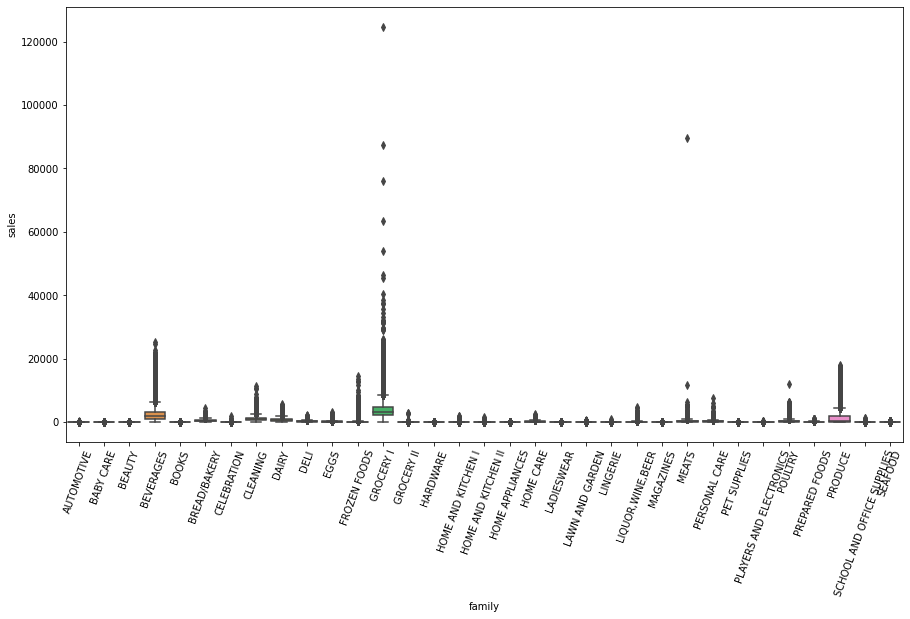

In [3]:
plt.figure(figsize=(15,8))
sns.boxplot(x= df_train["family"], y=df_train["sales"])
locs, labels = plt.xticks()
plt.setp(labels, rotation=70);


### Creating the dataframe for the Stores file

In [4]:
df_stores = pd.read_csv("gs://business-case/stores.csv")
df_stores

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [5]:
df_stores.groupby('city')

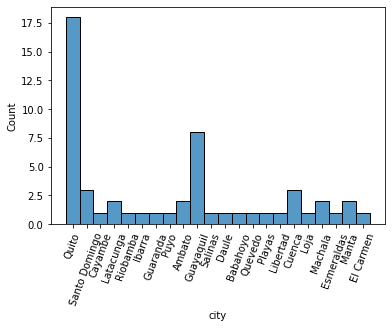

In [6]:
sns.histplot(df_stores["city"])
locs, labels = plt.xticks()
plt.setp(labels, rotation=70);

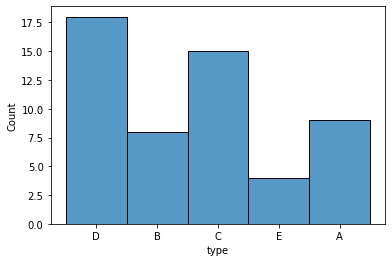

In [7]:
sns.histplot(df_stores["type"]);

# Creating a mapa for each city

## Importing useful libraries

In [8]:
#!pip install -U s3fs folium
import folium
from folium.plugins import HeatMap
from folium.plugins import HeatMapWithTime

## Creating a heatmap

### Creating a DataFrame with the Informations of the cities

In [9]:
df_heatmap = pd.read_csv("/root/code/mrdaraujo/Heatmap.csv")
df_heatmap.rename(columns = {'Unnamed: 0':'City', 'Unnamed: 1':'Lat', 'Unnamed: 2':'Lon', 'Unnamed: 3':'Weight'}, inplace = True)
df_heatmap

,City,Lat,Lon,Weight
0,city,lat,lon,weight
1,Quito,-0.1783523031,-78.4587897,18
2,Santo Domingo,-0.2573192362,-79.17520814,3
3,Cayambe,0.04266553824,-78.14562698,1
4,Latacunga,-0.9335619099,-78.61440404,2
5,Riobamba,-1.668152557,-78.65198534,1
6,Ibarra,0.3469331238,-78.13233517,1
7,Guaranda,-1.53282959,-79.00644372,1
8,Puyo,-1.493138393,-78.00040096,1
9,Ambato,-1.254569063,-78.62299276,2


In [10]:
df_heatmap.drop(labels=0, axis=0, inplace=True)

In [11]:
df_heatmap


,City,Lat,Lon,Weight
1,Quito,-0.1783523031,-78.4587897,18
2,Santo Domingo,-0.2573192362,-79.17520814,3
3,Cayambe,0.04266553824,-78.14562698,1
4,Latacunga,-0.9335619099,-78.61440404,2
5,Riobamba,-1.668152557,-78.65198534,1
6,Ibarra,0.3469331238,-78.13233517,1
7,Guaranda,-1.53282959,-79.00644372,1
8,Puyo,-1.493138393,-78.00040096,1
9,Ambato,-1.254569063,-78.62299276,2
10,Guayaquil,-2.190046076,-79.89591672,8


In [12]:
# new_heatmap = df_heatmap
# gradient = {0.2: 'blue', 0.4: 'lime', 0.6: 'orange', 1: 'red'}
# testing = folium.Map(location=center_location, control_scale=True, zoom_start=11)

In [13]:
# HeatMap(data=heatmap_data, radius=5, gradient=gradient, max_zoom=13).add_to(testing)
# testing

### Creating a Heat Map for each city

In [14]:
center_location = [-1.3552367277094446, -78.02500586294607]
m = folium.Map(location=center_location, control_scale=True, zoom_start=11)

In [15]:
heatmap_data = [[-0.1783523031,-78.4587897], [-0.2573192362, -79.17520814], [0.04266553824, -78.14562698], [-0.9335619099, -78.61440404], [-1.668152557,-78.65198534], [0.3469331238, -78.13233517], [-1.53282959,-79.00644372], [-1.493138393,-78.00040096], [-1.254569063,-78.62299276], [-2.190046076,-79.89591672], [-2.224225066,-80.95636438], [-1.861665266,-79.97758321], [-1.80188957,-79.53526512], [-1.022975477,-79.46288576], [-2.605399901,-80.3880077], [-2.231676838,-80.90087428], [-2.900436002,-79.00792883], [-3.994920984,-79.2034668], [-3.197789669,-79.88506978], [0.9699141564, -79.65087377], [-0.9676301717,-80.70745538], [-0.2156214788,-79.45971965]]
gradient = {0.2: 'blue', 0.4: 'lime', 0.6: 'orange', 1: 'red'}

In [16]:
HeatMap(data=heatmap_data, radius=7, gradient=gradient, max_zoom=13).add_to(m)
m

### Creating a Markers map

In [17]:
markers = folium.Map(location=center_location, control_scale=True, zoom_start=7)

In [18]:
df_heatmap

,City,Lat,Lon,Weight
1,Quito,-0.1783523031,-78.4587897,18
2,Santo Domingo,-0.2573192362,-79.17520814,3
3,Cayambe,0.04266553824,-78.14562698,1
4,Latacunga,-0.9335619099,-78.61440404,2
5,Riobamba,-1.668152557,-78.65198534,1
6,Ibarra,0.3469331238,-78.13233517,1
7,Guaranda,-1.53282959,-79.00644372,1
8,Puyo,-1.493138393,-78.00040096,1
9,Ambato,-1.254569063,-78.62299276,2
10,Guayaquil,-2.190046076,-79.89591672,8


#### Printing the first Marker on the map

In [19]:
city_1 = df_heatmap.iloc[0]
folium.Marker(location=[city_1['Lat'],city_1['Lon']]).add_to(markers)
markers

In [20]:
df_heatmap

,City,Lat,Lon,Weight
1,Quito,-0.1783523031,-78.4587897,18
2,Santo Domingo,-0.2573192362,-79.17520814,3
3,Cayambe,0.04266553824,-78.14562698,1
4,Latacunga,-0.9335619099,-78.61440404,2
5,Riobamba,-1.668152557,-78.65198534,1
6,Ibarra,0.3469331238,-78.13233517,1
7,Guaranda,-1.53282959,-79.00644372,1
8,Puyo,-1.493138393,-78.00040096,1
9,Ambato,-1.254569063,-78.62299276,2
10,Guayaquil,-2.190046076,-79.89591672,8


#### Implementing the markers into the map

In [21]:
for _, df in df_heatmap.iterrows():
    folium.Marker(
        location=[df['Lat'], df['Lon']],
    ).add_to(markers)

markers